## How to visualize your data
by Anne Urai, Leiden University, February 2024
Inspired by 'How to write a paper (with me) by Matteo Carandini: 

Brief note on 'NYU dataviz style'

References: Tufte


### Basic plot
We'll work with the example `fmri` dataset from seaborn.

In [38]:
# import what we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# let's set some defaults for the plot
# copied from https://github.com/anne-urai/2022_Urai_choicehistory_MEG/blob/main/hddmnn_funcs.py#L82
def seaborn_style():
    """
    Set seaborn style for plotting figures
    """

    sns.set(style="ticks", context="paper",
            font="Arial", # on Mac: Helvetiva is even better
            rc={"font.size": 9,
                "axes.titlesize": 9,
                "axes.labelsize": 9,
                "lines.linewidth": 1,
                "xtick.labelsize": 7,
                "ytick.labelsize": 7,
                "savefig.transparent": True,
                "xtick.major.size": 2.5,
                "ytick.major.size": 2.5,
                "xtick.minor.size": 2,
                "ytick.minor.size": 2,
                })
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42

# call this function at the start to set all defaults across plots
seaborn_style()


<Axes: xlabel='timepoint', ylabel='signal'>

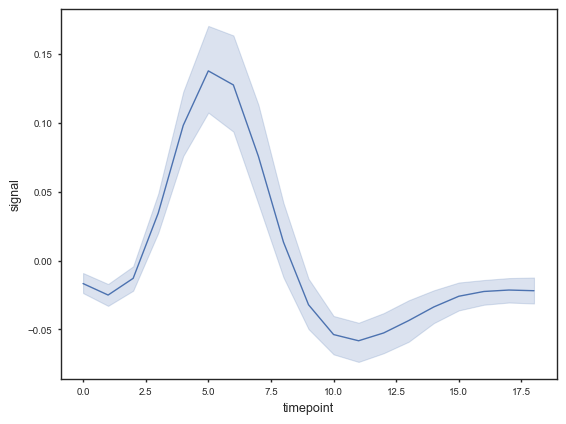

In [39]:

# read in the data
df = sns.load_dataset('fmri')
# plot this data in the most basic way
sns.lineplot(x='timepoint', y='signal', data=df)

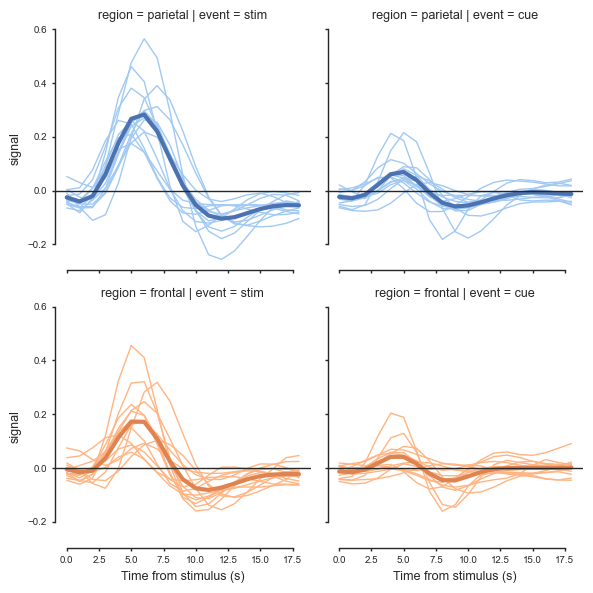

In [45]:
# now, let's make this more informative in a number of ways!
g = sns.FacetGrid(df, row='region', col='event') # split by brain regions and events
# here, I separately plot the individual subject data and the group data. 
# If the individual data are way outside the range of the group data, errorbar='band' may be easier to inspect.
g.map(sns.lineplot, 'timepoint', 'signal', 
      hue=df.region, palette='pastel',
      units=df.subject, estimator=None, #show all the data
      ) # plot the data at individual subject level
g.map(sns.lineplot, 'timepoint', 'signal', 
      hue=df.region, palette='deep',
      linewidth=3,
      errorbar=None,
      ) # plot the group data on top
g.refline(y=0, linestyle='-', color='.15', linewidth=1) # add a reference line at y=0
sns.despine(trim=True) # remove the top and right spines; this removes unnecessary ink


In [47]:
# seaborn will automatically insert some titles for plot labelling. 
# However, I find adding these into the axis labels makes it easier to read (and less cluttered)
g.axes # this is what the 'axes' object looks like

array([[<Axes: title={'center': 'region = parietal | event = stim'}, ylabel='signal'>,
        <Axes: title={'center': 'region = parietal | event = cue'}>],
       [<Axes: title={'center': 'region = frontal | event = stim'}, xlabel='Time from stimulus (s)', ylabel='signal'>,
        <Axes: title={'center': 'region = frontal | event = cue'}, xlabel='Time from stimulus (s)'>]],
      dtype=object)

Text(12, 0.25, 'timepoint 2')

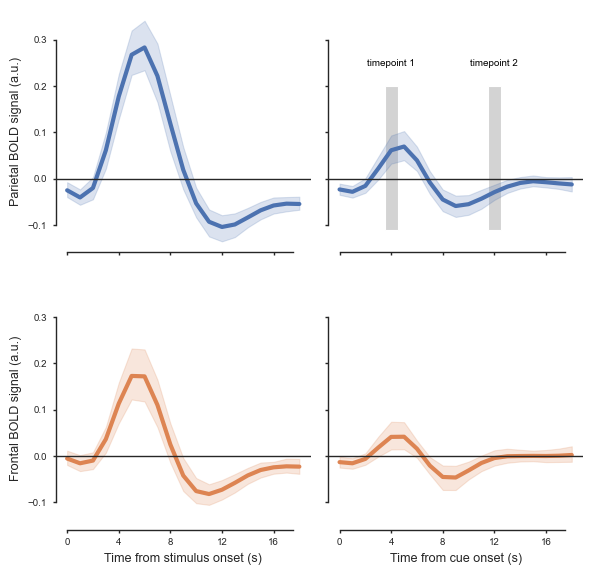

In [98]:
# same as above
g = sns.FacetGrid(df, row='region', col='event') # split by brain regions and events
# here, I separately plot the individual subject data and the group data. 
# If the individual data are way outside the range of the group data, errorbar='band' may be easier to inspect.
# g.map(sns.lineplot, 'timepoint', 'signal', 
#       hue=df.region, palette='pastel',
#       units=df.subject, estimator=None, #show all the data
#       ) # plot the data at individual subject level
g.map(sns.lineplot, 'timepoint', 'signal', 
      hue=df.region, palette='deep',
      linewidth=3,
      errorbar='ci',
      ) # plot the group data on top
g.refline(y=0, linestyle='-', color='.15', linewidth=1) # add a reference line at y=0
sns.despine(trim=True) # remove the top and right spines; this removes unnecessary ink

# pick useful x-axis tickmarks
g.set(xticks=[0, 4, 8, 12, 16]) # set the x-axis limits and ticks

# now, let's use the labels to make this even more informative
g.axes[0,0].set(title=None, ylabel='Parietal BOLD signal (a.u.)') # set the title of the first subplot
g.axes[0,1].set(title=None, ylabel=None) # set the title of the first subplot
g.axes[1,0].set(title=None, ylabel='Frontal BOLD signal (a.u.)',
                xlabel='Time from stimulus onset (s)') # set the title of the first subplot
g.axes[1,1].set(title=None, ylabel=None,
                xlabel='Time from cue onset (s)') # set the title of the first subplot


# # add some information to each axis
# for ax in g.axes.flatten():
#     ax.add_patch(mpl.patches.Rectangle((3.5,-0.21), 1, 0.81, 
#                                             facecolor='lightgrey'))
#     ax.add_patch(mpl.patches.Rectangle((11.5,-0.21), 1, 0.81, 
#                                             facecolor='lightgrey'))

# OR: only in one plot?
g.axes[0,1].add_patch(mpl.patches.Rectangle((3.5,-0.11), 1, 0.31, 
                                        facecolor='lightgrey', 
                                        zorder=-10)) #zorder makes sure this is behind the data
g.axes[0,1].text(4, 0.25, 'timepoint 1', ha='center', va='center', fontsize=7, color='black')
g.axes[0,1].add_patch(mpl.patches.Rectangle((11.5,-0.11), 1, 0.31, 
                                        facecolor='lightgrey',
                                        zorder=-10)) #zorder makes sure this is behind the data
g.axes[0,1].text(12, 0.25, 'timepoint 2', ha='center', va='center', fontsize=7, color='black')



### Let's also make some plots to better show individual-level variability
To accompany the timecourses

[Text(0.5, 1.0, ''),
 Text(322.02777777777777, 0.5, ''),
 Text(0.5, 25.89062499999997, 'Time from cue onset (s)')]

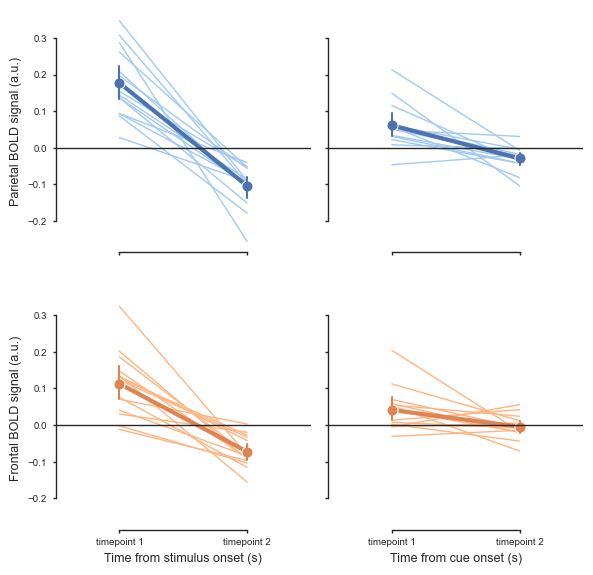

In [99]:
g = sns.FacetGrid(df[df.timepoint.isin([4,12])], # now only plot the data at these timepoints
                  row='region', col='event') # split by brain regions and events
g.map(sns.lineplot, 'timepoint', 'signal', 
      hue=df.region, palette='pastel',
      units=df.subject, estimator=None, #show all the data
      ) # plot the data at individual subject level
g.map(sns.lineplot, 'timepoint', 'signal', 
      hue=df.region, palette='deep',
      linewidth=3,
      marker='o', markersize=8,
      errorbar='ci',
      err_style='bars', # show the 95% confidence interval around the mean
      err_kws={'capsize': 0, 'elinewidth': 1.5, 'capthick': 1}
      ) # plot the group data on top
g.refline(y=0, linestyle='-', color='.15', linewidth=1) # add a reference line at y=0
sns.despine(trim=True) # remove the top and right spines; this removes unnecessary ink

# pick useful x-axis tickmarks + change the labels!
g.set(xticks=[4, 12], xlim=[0, 16]) # set the x-axis limits and ticks
g.set_xticklabels(['timepoint 1', 'timepoint 2'])

# now, let's use the labels to make this even more informative
g.axes[0,0].set(title=None, ylabel='Parietal BOLD signal (a.u.)') # set the title of the first subplot
g.axes[0,1].set(title=None, ylabel=None) # set the title of the first subplot
g.axes[1,0].set(title=None, ylabel='Frontal BOLD signal (a.u.)',
                xlabel='Time from stimulus onset (s)') # set the title of the first subplot
g.axes[1,1].set(title=None, ylabel=None,
                xlabel='Time from cue onset (s)') # set the title of the first subplot


/opt/anaconda3/envs/iblenv/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


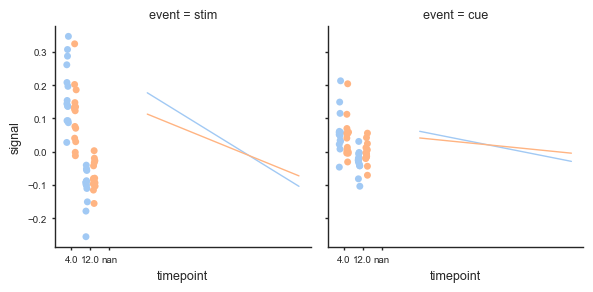

In [112]:
# now imagine these data were not paired, but from different subjects
# and that we wanted to compare different areas in one plot

g = sns.FacetGrid(df[df.timepoint.isin([4,12])], # now only plot the data at these timepoints
                   col='event') # split by brain regions and events
g.map(sns.stripplot, 'timepoint', 'signal',
      hue=df.region, palette='pastel',
      legend=False,
      dodge=True)
# now also show the group
g.map(sns.lineplot, 'timepoint', 'signal',
      hue=df.region, palette='pastel',
      errorbar=None)
# sns.pointplot(
#     data=penguins, x="species", y="bill_depth_mm", hue="sex",
#     dodge=.4, linestyle="none", errorbar=None,
#     marker="_", markersize=20, markeredgewidth=3,
# )